<a href="https://colab.research.google.com/github/WilliamDietz/CSC-302-W1/blob/master/ICA12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-16-e4a73bc164db>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=edge_norm, cmap=edge_cmap))


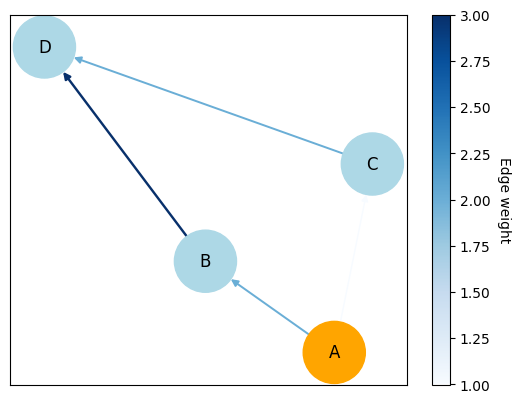

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/LA_County_Pair_Distance_Rating_Network.csv')

# create a sample graph
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D'])
G.add_weighted_edges_from([('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 3), ('C', 'D', 2)])

# compute the edge colors and widths
edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
edge_widths = [np.sqrt(G[u][v]['weight']) for u, v in G.edges()]

# compute the node colors
node_colors = ['orange' if node=='A' else 'lightblue' for node in G.nodes()]

# draw the network
pos = nx.spring_layout(G, k=0.5)
edge_cmap = plt.cm.Blues
edge_norm = plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))
edge_colors = [edge_norm(x) for x in edge_colors]
nx.draw_networkx(G, pos, node_color=node_colors, node_size=2000, cmap='cool', edge_color=edge_colors, width=edge_widths, edge_cmap=edge_cmap, edge_vmin=min(edge_colors), edge_vmax=max(edge_colors), with_labels=True)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=edge_norm, cmap=edge_cmap))
cbar.ax.set_ylabel('Edge weight', rotation=270, labelpad=15)
plt.show()



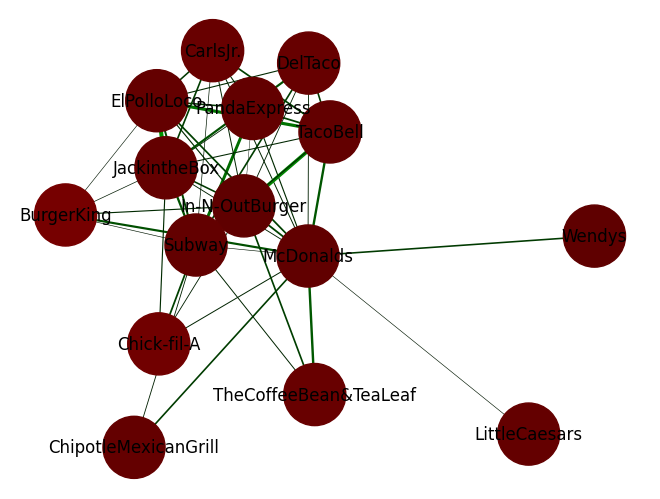

In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load data from csv
df = pd.read_csv('/content/drive/MyDrive/LA_County_Pair_Distance_Rating_Network.csv')

# create graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

# create node color map based on average rating
node_colors = {}
for idx, row in df.iterrows():
    avg_rating = row['Source_Average_Rating']
    # convert the average rating to a hexadecimal color code string
    color_code = '#{:02X}{:02X}{:02X}'.format(int(avg_rating * 25.5), 0, 0)
    node_colors[row['Source']] = color_code

# create border color and width maps based on standard deviation of ratings
border_colors = {}
border_widths = {}
for idx, row in df.iterrows():
    sd_rating = row['Target_sd_rating']
    # convert the standard deviation to a hexadecimal color code string
    color_code = '#{:02X}{:02X}{:02X}'.format(0, int(sd_rating * 255), 0)
    border_colors[(row['Source'], row['Target'])] = color_code
    # set border width based on the standard deviation
    border_widths[(row['Source'], row['Target'])] = sd_rating * 5

# draw the graph
pos = nx.spring_layout(G, seed=42) # set seed for reproducibility
nx.draw(G, pos, node_size=2000, with_labels=True, node_color=list(node_colors.values()), 
        edge_color=list(border_colors.values()), width=list(border_widths.values()))

plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load data from csv
df = pd.read_csv('/content/drive/MyDrive/LA_County_Pair_Distance_Rating_Network.csv')

# create graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

# create node color map based on average rating
node_colors = {}
for idx, row in df.iterrows():
    avg_rating = row['Source_Average_Rating']
    # convert the average rating to a hexadecimal color code string
    color_code = '#{:02X}{:02X}{:02X}'.format(int(avg_rating * 50), 0, 0)[:7]
    node_colors[row['Source']] = color_code

# create border color and width maps based on standard deviation of ratings
border_colors = {}
border_widths = {}
for idx, row in df.iterrows():
    sd_rating = row['Target_sd_rating']
    # convert the standard deviation to a hexadecimal color code string
    color_code = '#{0:02X}{1:02X}{2:02X}'.format(0, int(sd_rating * 255), 0)[:7]
    border_colors[(row['Source'], row['Target'])] = color_code
    # set border width based on the standard deviation
    border_widths[(row['Source'], row['Target'])] = sd_rating * 10

# overwrite the node color map based on target median rating
for idx, row in df.iterrows():
    target_median_rating = row['Target_median_rating']
    # convert the target median rating to a hexadecimal color code string
    color_code = '#{:02X}{:02X}{:02X}'.format(0, 0, int(target_median_rating * 50))
    node_colors[row['Target']] = color_code

# overwrite the border color and width maps based on target average distance
for idx, row in df.iterrows():
    target_avg_distance = row['Target_avg_distance']
    # convert the target average distance to a hexadecimal color code string
    color_code = '#{:02X}{:02X}{:02X}'.format(int(target_avg_distance * 50), 0, 0)
    border_colors[(row['Source'], row['Target'])] = color_code
    # set border width based on the target average distance
    border_widths[(row['Source'], row['Target'])] = target_avg_distance * 5

# draw the graph
pos = nx.spring_layout(G, seed=42) # set seed for reproducibility
nx.draw(G, pos, node_size=2000, with_labels=True, node_color=list(node_colors.values()), 
        edge_color=list(border_colors.values()), width=list(border_widths.values()))

# add edge labels
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()
